<a href="https://colab.research.google.com/github/Vinisha-A/Keyword_extraction_using_NLP/blob/main/Nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

The TfidfVectorizer is a text processing tool in the scikit-learn library used to convert a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. It plays a crucial role in keyword extraction by transforming text data into numerical features that capture the significance of words in the documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = """
Artificial Intelligence (AI) is revolutionizing industries across the globe.
Healthcare has benefited from AI-powered diagnosis tools, robotic surgeries, and patient monitoring systems.
Financial institutions utilize AI for fraud detection, algorithmic trading, and customer service chatbots.
The transportation sector is undergoing changes with autonomous vehicles and intelligent traffic management.
Despite its advantages, AI also presents ethical dilemmas like data privacy issues, algorithmic bias, and job automation concerns.
Research organizations and governments are working together to create guidelines for the responsible development of AI technologies.
Future innovations are expected to make AI an even more integral part of daily life, impacting education, entertainment, and personalized services.
"""


corpus = [text]
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tfidf_matrix = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()
scores = zip(feature_names, tfidf_matrix.toarray()[0])
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

print("\nTop Keywords from TF-IDF:\n")
for word, score in sorted_scores[:10]:
    print(f"{score:.4f} → {word}")


Top Keywords from TF-IDF:

0.4460 → ai
0.1487 → algorithmic
0.0743 → advantages
0.0743 → advantages ai
0.0743 → ai fraud
0.0743 → ai integral
0.0743 → ai powered
0.0743 → ai presents
0.0743 → ai revolutionizing
0.0743 → ai technologies


In [ ]:
pip install rake-nltk


In [ ]:
import nltk
nltk.download('stopwords')
from rake_nltk import Rake

# Example text
text = """
Artificial Intelligence (AI) is revolutionizing industries across the globe.
Healthcare has benefited from AI-powered diagnosis tools, robotic surgeries, and patient monitoring systems.
Financial institutions utilize AI for fraud detection, algorithmic trading, and customer service chatbots.
The transportation sector is undergoing changes with autonomous vehicles and intelligent traffic management.
Despite its advantages, AI also presents ethical dilemmas like data privacy issues, algorithmic bias, and job automation concerns.
Research organizations and governments are working together to create guidelines for the responsible development of AI technologies.
Future innovations are expected to make AI an even more integral part of daily life, impacting education, entertainment, and personalized services.
"""


# Step 1: Manual sentence split
sentences = text.split('\n')

# Step 2: Initialize RAKE
rake = Rake()

# Step 3: Extract keywords
rake.extract_keywords_from_sentences(sentences)

# Step 4: Ranked phrases
ranked_phrases = rake.get_ranked_phrases_with_scores()

# Step 5: Display top keyphrases
print("\nTop Keyphrases from RAKE:\n")
for score, phrase in ranked_phrases:
    print(f"{score:.2f} → {phrase}")



Top Keyphrases from RAKE:

75.17 → ai also presents ethical dilemmas like data privacy issues
15.17 → financial institutions utilize ai
9.00 → revolutionizing industries across
9.00 → powered diagnosis tools
9.00 → patient monitoring systems
9.00 → job automation concerns
9.00 → intelligent traffic management
9.00 → customer service chatbots
5.17 → make ai
5.17 → ai technologies
4.00 → working together
4.00 → undergoing changes
4.00 → transportation sector
4.00 → robotic surgeries
4.00 → responsible development
4.00 → research organizations
4.00 → personalized services
4.00 → integral part
4.00 → impacting education
4.00 → future innovations
4.00 → fraud detection
4.00 → daily life
4.00 → create guidelines
4.00 → autonomous vehicles
4.00 → artificial intelligence
4.00 → algorithmic trading
4.00 → algorithmic bias
3.17 → ai
3.17 → ai
1.00 → healthcare
1.00 → governments
1.00 → globe
1.00 → expected
1.00 → even
1.00 → entertainment
1.00 → despite
1.00 → benefited
1.00 → advantages


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TextRank is an unsupervised graph-based algorithm for keyword extraction and text summarization, inspired by the PageRank algorithm used by search engines. It operates by constructing a graph where each word or phrase is a node, and edges are formed between nodes that co-occur within a certain window in the text. The idea is that important words or phrases, which appear frequently and are central to the document's context, will have stronger connections and higher "rank" within the graph.



🔵 Candidate Phrases:
['artificial intelligence', 'ai', 'industries', 'the globe', 'healthcare', 'ai-powered diagnosis tools', 'robotic surgeries', 'patient monitoring systems', 'financial institutions', 'ai', 'fraud detection', 'algorithmic trading', 'customer service chatbots', 'the transportation sector', 'changes', 'autonomous vehicles', 'intelligent traffic management', 'its advantages', 'ai', 'ethical dilemmas', 'data privacy issues', 'algorithmic bias', 'job automation concerns', 'research organizations', 'governments', 'guidelines', 'the responsible development', 'ai technologies', 'future innovations', 'ai', 'daily life', 'education', 'entertainment', 'personalized services']

TF-IDF Matrix Shape: (34, 58)


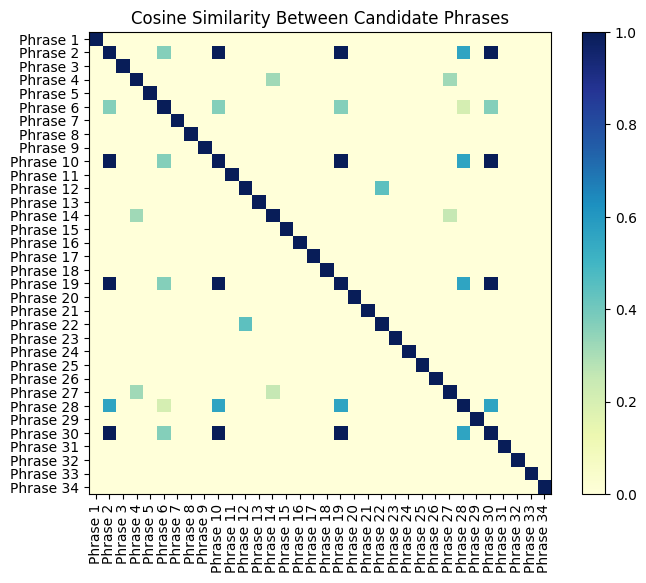


🔵 Ranked Phrases:

0.0329 → ai
0.0329 → ai
0.0329 → ai
0.0329 → ai
0.0300 → the globe
0.0294 → robotic surgeries
0.0294 → research organizations
0.0294 → personalized services
0.0294 → patient monitoring systems
0.0294 → job automation concerns
0.0294 → its advantages
0.0294 → intelligent traffic management
0.0294 → industries
0.0294 → healthcare
0.0294 → guidelines
0.0294 → governments
0.0294 → future innovations
0.0294 → fraud detection
0.0294 → financial institutions
0.0294 → ethical dilemmas
0.0294 → entertainment
0.0294 → education
0.0294 → data privacy issues
0.0294 → daily life
0.0294 → customer service chatbots
0.0294 → changes
0.0294 → autonomous vehicles
0.0294 → artificial intelligence
0.0294 → algorithmic trading
0.0294 → algorithmic bias
0.0291 → the transportation sector
0.0291 → the responsible development
0.0245 → ai technologies
0.0204 → ai-powered diagnosis tools


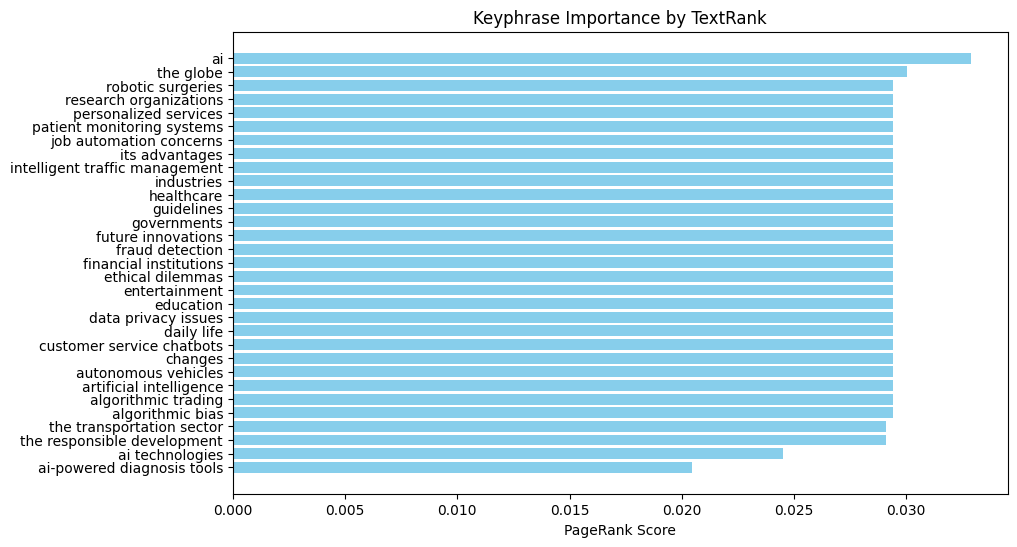

In [ ]:
# Step 1: Install libraries if not done yet
# pip install spacy scikit-learn networkx matplotlib

# Step 2: Imports
#!pip install networkx
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 3: Load SpaCy Model
nlp = spacy.load('en_core_web_sm')

# Step 4: Input Better Example Text
text = """
Artificial Intelligence (AI) is revolutionizing industries across the globe.
Healthcare has benefited from AI-powered diagnosis tools, robotic surgeries, and patient monitoring systems.
Financial institutions utilize AI for fraud detection, algorithmic trading, and customer service chatbots.
The transportation sector is undergoing changes with autonomous vehicles and intelligent traffic management.
Despite its advantages, AI also presents ethical dilemmas like data privacy issues, algorithmic bias, and job automation concerns.
Research organizations and governments are working together to create guidelines for the responsible development of AI technologies.
Future innovations are expected to make AI an even more integral part of daily life, impacting education, entertainment, and personalized services.
"""

# Step 5: Candidate Phrase Extraction (Noun Chunks)
doc = nlp(text)
candidates = [chunk.text.lower().strip() for chunk in doc.noun_chunks if not chunk.root.is_stop and len(chunk.text.strip()) > 1]

print("\n🔵 Candidate Phrases:")
print(candidates)

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(candidates)

print("\nTF-IDF Matrix Shape:", X.shape)

# Step 7: Cosine Similarity Matrix
similarity_matrix = cosine_similarity(X)

# Step 8: Visualize Similarity Matrix
plt.figure(figsize=(8,6))
plt.imshow(similarity_matrix, interpolation='nearest', cmap='YlGnBu')
plt.colorbar()
plt.title("Cosine Similarity Between Candidate Phrases")
plt.xticks(ticks=range(len(candidates)), labels=[f"Phrase {i+1}" for i in range(len(candidates))], rotation=90)
plt.yticks(ticks=range(len(candidates)), labels=[f"Phrase {i+1}" for i in range(len(candidates))])
plt.show()

# Step 9: Build Graph
nx_graph = nx.from_numpy_array(similarity_matrix)

# Step 10: Apply PageRank
scores = nx.pagerank(nx_graph)

# Step 11: Rank Phrases
ranked_phrases = sorted(((scores[i], phrase) for i, phrase in enumerate(candidates)), reverse=True)

print("\n🔵 Ranked Phrases:\n")
for score, phrase in ranked_phrases:
    print(f"{score:.4f} → {phrase}")

# Step 12: Bar Plot of Top Phrases
ranked_df = pd.DataFrame(ranked_phrases, columns=['PageRank Score', 'Phrase'])

plt.figure(figsize=(10,6))
plt.barh(ranked_df['Phrase'], ranked_df['PageRank Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('PageRank Score')
plt.title('Keyphrase Importance by TextRank')
plt.show()


In [ ]:
def precision_recall(true_keywords, predicted_keywords):
    true_keywords = set([kw.lower() for kw in true_keywords])
    predicted_keywords = set([kw.lower() for kw in predicted_keywords])

    true_positives = len(true_keywords.intersection(predicted_keywords))
    precision = true_positives / len(predicted_keywords) if predicted_keywords else 0
    recall = true_positives / len(true_keywords) if true_keywords else 0

    return precision, recall


In [ ]:
# Ground Truth Keywords (Updated based on TextRank output)
true_keywords = [
    'ai', 'artificial intelligence', 'robotic surgeries', 'patient monitoring systems',
    'fraud detection', 'algorithmic trading', 'customer service chatbots',
    'autonomous vehicles', 'intelligent traffic management',
    'data privacy issues', 'algorithmic bias', 'job automation concerns',
    'guidelines', 'ai technologies', 'research organizations',
    'financial institutions', 'healthcare', 'personalized services',
    'future innovations', 'education', 'entertainment'
]


In [ ]:
predicted_keywords_tfidf = [word for word, score in sorted_scores[:10]]

predicted_keywords_rake = [phrase for score, phrase in ranked_phrases[:10]]

predicted_keywords_textrank = [phrase for score, phrase in ranked_phrases[:10]]


In [ ]:
precision_tfidf, recall_tfidf = precision_recall(true_keywords, predicted_keywords_tfidf)
precision_rake, recall_rake = precision_recall(true_keywords, predicted_keywords_rake)
precision_textrank, recall_textrank = precision_recall(true_keywords, predicted_keywords_textrank)

print(f"TF-IDF -> Precision: {precision_tfidf:.2f}, Recall: {recall_tfidf:.2f}")
print(f"RAKE -> Precision: {precision_rake:.2f}, Recall: {recall_rake:.2f}")
print(f"TextRank -> Precision: {precision_textrank:.2f}, Recall: {recall_textrank:.2f}")


TF-IDF -> Precision: 0.20, Recall: 0.10
RAKE -> Precision: 0.86, Recall: 0.29
TextRank -> Precision: 0.86, Recall: 0.29


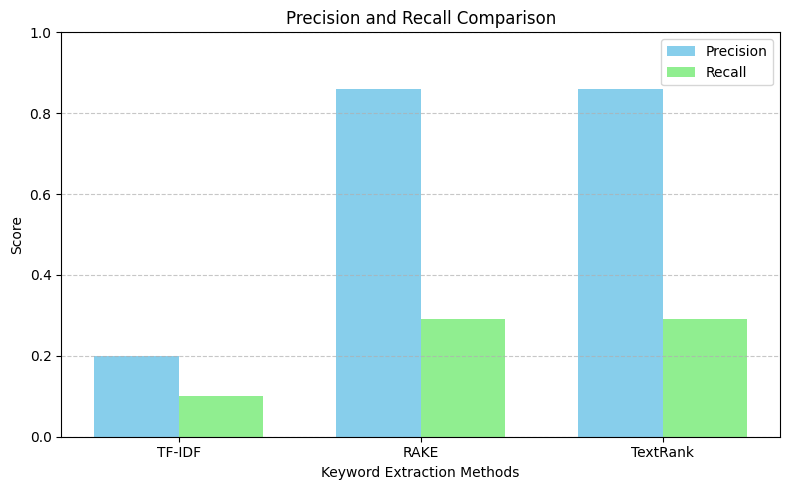

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Technique names
methods = ['TF-IDF', 'RAKE', 'TextRank']

# Precision and Recall values
precision = [0.20, 0.86, 0.86]
recall = [0.10, 0.29, 0.29]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(methods))

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(index, precision, bar_width, label='Precision', color='skyblue')
plt.bar(index + bar_width, recall, bar_width, label='Recall', color='lightgreen')

# Labels and Title
plt.xlabel('Keyword Extraction Methods')
plt.ylabel('Score')
plt.title('Precision and Recall Comparison')
plt.xticks(index + bar_width / 2, methods)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
